# New BrainNet

## probability estimation

In [1]:
import numpy as np
import networkx as nx
import math
import gtda as gtda
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PairwiseDistance
from igraph import Graph
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import os
import pickle

Then we import homemade modules

In [1]:
from homology_modules import *

Then we load our precomputed diagrams

In [4]:
with open("DATA/data.diagrams_small_world","rb") as f:
  small_worlds=pickle.load(f)

with open("DATA/data.diagrams_coma", "rb") as f:
  (diagrams_coma,VR_coma)=pickle.load( f)

with open("DATA/data.diagrams_HCP_90", "rb") as f:
  (diagrams_HCP_90,VR_HCP_90)=pickle.load( f)

We start evaluating distances

In [5]:
costs=np.linspace(1/44,1, 100)
homology_dimensions=[1,2,3,4]
probs=np.linspace(0,0.5,10)
distances,variances=compute_distances(diagrams_coma,small_worlds, homology_dimensions,costs,0)

In [10]:
prob_estimates(distances,probs)

array([0.16666667, 0.05555556, 0.27777778, 0.44444444, 0.44444444,
       0.16666667, 0.44444444, 0.        , 0.05555556, 0.16666667,
       0.11111111, 0.44444444, 0.27777778, 0.16666667, 0.16666667,
       0.27777778, 0.05555556])

In [11]:
distances

array([[124.62228469,  59.71383289,  55.42424134,  51.52257868,
         55.08652318,  52.99050467,  59.76022798,  58.97785959,
         57.96922778,  62.0576039 ],
       [102.35542322,  59.03024854,  61.2694342 ,  61.97709902,
         68.74157895,  69.44824739,  74.03472585,  74.30051004,
         73.26393916,  76.54873538],
       [136.27371217,  71.54774984,  71.51819966,  68.46760444,
         71.30142611,  67.65472845,  73.61703083,  71.92581876,
         68.95402216,  72.44025227],
       [147.16035693,  81.34941354,  72.33353301,  61.07164532,
         51.74031374,  41.50300444,  41.21561843,  34.72316259,
         29.18053366,  30.29157007],
       [146.13788641,  78.69686797,  77.18285792,  72.59377596,
         72.63433065,  67.97020868,  74.03336614,  70.3658652 ,
         66.34092104,  69.3377137 ],
       [118.60763403,  60.20922942,  60.69871454,  58.97860779,
         63.5618594 ,  62.06190667,  68.21882388,  67.50310318,
         65.58957308,  69.4041509 ],
       [14

In [7]:
estimated_probability=[]
estimated_distance=[]
for i in range(len(distances)):
    tks=distance_spline(distances[i,:],probs)
    minimum_x,minimum_fun = optimize_spline(tks,probs)
    estimated_probability.append(minimum_x)
    estimated_distance.append(minimum_fun)

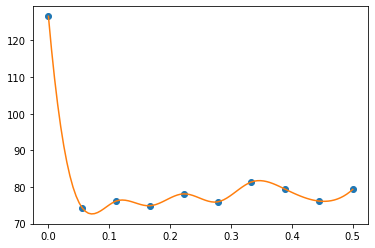

In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
y = distances[8,:]
x = probs
spl = splrep(x, y,s=0.0)
x2 = np.linspace(0 ,max(probs),100)
y2 = splev(x2, spl)
plt.plot(x, y, 'o', x2, y2)
plt.show()

In [18]:
estimated_probability

[0.16721549521622453,
 0.0704503033391169,
 0.16812143583032246,
 0.4653613800704405,
 0.45319243581373336,
 0.16337961674706966,
 0.27517518778569083,
 4.469534883430863e-06,
 0.16473656428242284,
 0.08329647534685311,
 0.081347285243987,
 0.4554002520583702,
 0.275666440635907,
 0.16070641377372752,
 0.15960788991838526,
 0.274320279256573,
 0.06341474970297949]

In [ ]:
small_worlds_estimated=[small_world_simulator(prob,homology_dimensions,costs,seed=rng.integers(0,1000000),n_samples_per_step=10) for prob in estimated_probability ]


In [19]:
distances_appo=np.asarray([[ 51.33376688,  60.34831568,  52.40914872,  61.24053775,
         61.0590055 ,  51.87912029,  53.00080567, 120.86561704,
         51.73513447,  57.60642603,  52.46765997,  60.269952  ,
         53.37445537,  50.89263382,  49.8173017 ,  56.8224977 ,
         61.07733184],
       [ 63.81451658,  60.93104345,  65.85560719,  76.10623173,
         75.89965934,  64.58319192,  69.10138759,  99.4102639 ,
         63.07142982,  59.96723813,  58.98950161,  75.17820927,
         68.74625662,  62.74559338,  61.7529084 ,  72.91748792,
         60.94811056],
       [ 68.59905507,  73.4450064 ,  69.16824996,  72.31067472,
         73.96631612,  68.04308834,  68.59390625, 132.33583324,
         68.65592941,  71.35339338,  65.71977674,  72.17401687,
         69.41891582,  68.3029211 ,  66.24243485,  72.64754373,
         73.7378172 ],
       [ 60.66723373,  80.48441684,  57.13290752,  31.04635133,
         34.62979668,  60.81738508,  41.58776047, 143.39197127,
         60.61627641,  76.76045616,  69.65675033,  30.93629551,
         42.55517043,  60.95087584,  59.06026321,  45.71127356,
         82.74996082],
       [ 71.6756412 ,  80.06591268,  72.2117055 ,  69.46826366,
         72.16055926,  71.87506138,  69.02775458, 142.30565365,
         73.26975315,  77.56437185,  70.75218912,  70.00598514,
         69.91611887,  72.00506551,  68.70321736,  72.81898036,
         81.66621946],
       [ 59.67453079,  61.2502387 ,  60.85066795,  68.69460719,
         68.53660245,  59.46950798,  62.63967644, 115.04897171,
         59.24849074,  60.07022418,  55.08227895,  68.11444037,
         62.99307075,  59.45561948,  57.2282293 ,  66.31314897,
         62.78796419],
       [ 73.75154024,  81.69254123,  74.28890807,  72.08479938,
         74.54867759,  73.80646095,  71.08413649, 143.27149902,
         75.06841211,  79.35296889,  72.59596531,  72.23962849,
         72.02562093,  74.04420756,  70.92835713,  74.8604545 ,
         83.30902992],
       [102.13454447,  89.06513121, 104.07490996, 115.60658725,
        115.31813555, 102.05218242, 109.18434723,  73.20988732,
         99.53278117,  90.12244195,  93.79205521, 114.54584991,
        108.17356986, 100.29402549, 100.66766502, 112.18646553,
         87.24492617],
       [ 75.00414195,  76.79497118,  76.6233429 ,  79.39284927,
         81.20188037,  75.60682902,  76.29060106, 123.62564415,
         75.80952667,  75.23717099,  70.9798672 ,  79.23461744,
         76.64811168,  74.65482555,  72.41641484,  79.93834331,
         77.02241085],
       [ 41.26229653,  46.17106395,  43.29491225,  62.67997795,
         59.91110519,  40.09014238,  49.80183447, 117.75197627,
         40.81489364,  44.19261584,  38.85523788,  61.46854897,
         50.00974701,  40.40006599,  39.01101213,  52.02000333,
         48.27916834],
       [ 46.14097038,  48.14211232,  48.72731618,  67.49237813,
         65.13956655,  45.70307223,  55.5603027 , 116.3749646 ,
         46.20627332,  46.60098755,  41.75761742,  66.44193592,
         55.85101529,  45.2410677 ,  44.29091527,  58.49832353,
         49.76675104],
       [ 77.52842703,  85.98772582,  77.99136747,  73.52100628,
         76.8340209 ,  77.73833202,  73.72258711, 145.93062149,
         79.1011287 ,  83.56871471,  76.82455743,  73.86583667,
         74.84145344,  77.85637586,  74.57120733,  77.81339029,
         87.49810548],
       [ 56.67812297,  68.85583917,  56.82474559,  60.8415413 ,
         61.03877359,  56.05253938,  54.25074508, 133.66762424,
         56.7031814 ,  66.43927526,  59.72178819,  59.33322111,
         54.90481732,  57.02927112,  54.49035065,  57.22401731,
         71.01596319],
       [ 46.69548605,  52.4021437 ,  48.95716681,  64.66203023,
         62.93412151,  46.75557824,  54.48500992, 128.36570637,
         48.65436967,  50.92327108,  43.99274633,  64.09235594,
         55.24570295,  46.6118804 ,  44.32900036,  56.50683541,
         55.52143858],
       [ 43.99941146,  48.78099353,  45.83807359,  63.62036209,
         61.21782666,  43.08351029,  51.96322295, 120.40048128,
         44.30710719,  47.35594511,  41.77060611,  62.75079701,
         52.57585718,  43.20223438,  41.97127269,  54.66991453,
         51.03735003],
       [ 51.34678313,  69.03997658,  51.57643481,  52.24791483,
         52.90360915,  51.75842353,  46.78654033, 139.39127766,
         53.60692396,  66.20239132,  56.90787279,  51.66552423,
         48.31471105,  53.04806657,  48.68572069,  50.14122537,
         72.52699619],
       [ 65.67734617,  54.94826374,  67.97921471,  84.1104683 ,
         83.17273789,  65.01066679,  75.00239436,  97.49601818,
         63.48368924,  54.94766964,  55.24232235,  83.20029694,
         74.26956581,  63.38571046,  63.82304035,  78.04333111,
         52.47913322]])


In [64]:
distances_new=np.concatenate([distances,distances_appo],axis=1)
probs_new=np.concatenate([probs,np.array(estimated_probability)])

In [65]:
prob_estimates(distances_new,probs_new)

array([1.59607890e-01, 8.13472852e-02, 8.13472852e-02, 4.44444444e-01,
       4.44444444e-01, 8.13472852e-02, 4.44444444e-01, 4.46953488e-06,
       8.13472852e-02, 8.13472852e-02, 8.13472852e-02, 4.44444444e-01,
       2.77777778e-01, 8.13472852e-02, 8.13472852e-02, 2.77777778e-01,
       5.55555556e-02])

In [71]:
prob_estimates(distances,probs)

array([0.16666667, 0.05555556, 0.27777778, 0.44444444, 0.44444444,
       0.16666667, 0.44444444, 0.        , 0.05555556, 0.16666667,
       0.11111111, 0.44444444, 0.27777778, 0.16666667, 0.16666667,
       0.27777778, 0.05555556])

Iterating this process to find an optimal probability doesn't seems to work. We should use a different type of approximation than the splines. Probably something that generalize linear regression is a good idea, but
1. we cannot use an homoschedastic model
2. we need to choose the functions in the model (polynomial, something more complex?)

## 5th dimension

In [72]:
path="regional-differentiation-based-on-graph-nodal-statistics-for-functional-brain-connectivity-networks-characterization/DATA/cor_mat_HCP_90"
files=os.listdir(path) #make a list of all the files' names at the path 
cor_mats_HCP_90_df=[pd.read_csv(path+"/"+file,delim_whitespace=True,header=None) for file in files]

In [73]:
path="regional-differentiation-based-on-graph-nodal-statistics-for-functional-brain-connectivity-networks-characterization/DATA/cor_mat_coma"
files=os.listdir(path) #make a list of all the files' names at the path 
cor_mats_coma_df=[pd.read_csv(path+"/"+file,delim_whitespace=True) for file in files]

In [74]:
cor_mats_HCP_90=[df.to_numpy() for df in cor_mats_HCP_90_df]
cor_mats_coma=[df.to_numpy() for df in cor_mats_coma_df]

In [ ]:
costs=np.linspace(1/44,1, 100)
diagrams_coma_5dim,VR_coma_5dim=custom_vietoris_persistance(cor_mats_coma,costs,[5],plot=False)

/Users/simonechiominto/Dropbox (Politecnico Di Torino Studenti)/grenoble/progetto/project_git/from_corr_to_graph.py:58: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MST=nx.adjacency_matrix(tree.minimum_spanning_tree(totalgraph).to_undirected()).todense()


In [ ]:
diagrams_HCP_90_5th,VR_HCP_90_5th=custom_vietoris_persistance(cor_mats_HCP_90,costs,[5],plot=

In [ ]:
with open("/content/TDA_grenoble/data.diagrams_coma", "wb") as f:
  pickle.dump((diagrams_coma_5dim,VR_coma_5dim), f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("/content/TDA_grenoble/data.diagrams_HCP_90", "wb") as f:
  pickle.dump((diagrams_HCP_90_5th,VR_HCP_5th), f, protocol=pickle.HIGHEST_PROTOCOL)